In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 
import tabulate

In [14]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [15]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [16]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
biasArr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)
mseArr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    # predMatrix => storing predicted values for each degree
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg+1)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        mseArr[deg] += np.mean(np.square(y_pred - y_test))

    mseArr[deg] /= numModels
    bias2Arr[deg] = np.mean( (np.mean(predMatrix, axis = 0) - testData[:, 1] ) ** 2 ) 
    biasArr[deg] = np.mean( abs(np.mean(predMatrix, axis = 0) - testData[:, 1] )) 
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 0))

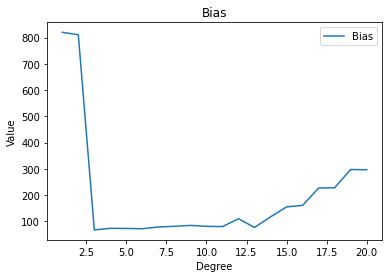

In [25]:
# plt.plot(varianceArr)
plt.plot(range(1, 21), biasArr, label = "Bias")
# plt.plot(mseArr)
plt.title('Bias')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

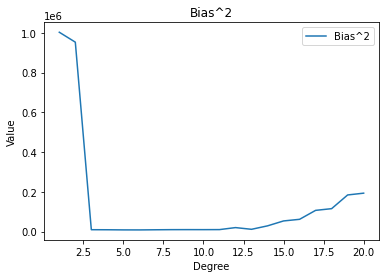

In [18]:
# plt.plot(varianceArr)
plt.plot(range(1, 21), bias2Arr, label = "Bias^2")
# plt.plot(mseArr)
plt.title('Bias^2')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

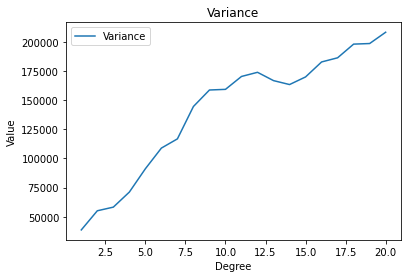

In [19]:
plt.plot(range(1, 21), varianceArr, label = "Variance")
plt.title('Variance')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

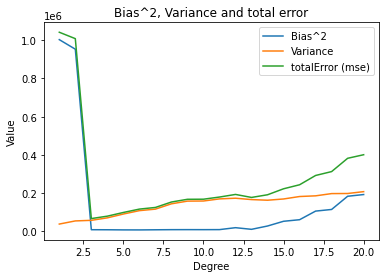

In [20]:
plt.plot( range(1, 21),bias2Arr, label = "Bias^2")
plt.plot(range(1, 21), varianceArr, label = "Variance")
plt.title('Bias^2, Variance and total error')
plt.plot(range(1, 21),mseArr, label='totalError (mse)')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()


In [21]:
# irreducible error

irredErrArr = mseArr - bias2Arr - varianceArr

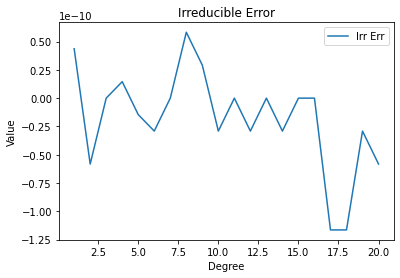

In [22]:

plt.plot(range(1, 21), irredErrArr, label = 'Irr Err')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.title('Irreducible Error')
# plt.plot(mseArr)
# plt.plot(varianceArr)
# plt.plot(bias2Arr)
plt.legend()
plt.show()

In [30]:
tableDF = pd.DataFrame({
    'degree': range(1, 21),
    'bias': biasArr,
    'variance': varianceArr,
})

In [31]:
print(tableDF)

    degree        bias       variance
0        1  820.007320   38675.602981
1        2  810.232614   55083.866978
2        3   67.783192   58210.773405
3        4   73.875928   71113.824226
4        5   73.316024   91106.639360
5        6   72.284573  108828.226726
6        7   78.886316  116725.492688
7        8   81.549830  144483.948992
8        9   84.920736  158618.967376
9       10   81.328545  159167.947564
10      11   80.444508  170229.512596
11      12  110.247894  173785.965912
12      13   77.244832  166663.770936
13      14  117.410480  163289.191405
14      15  155.396072  169819.238817
15      16  161.110757  182661.332741
16      17  227.112607  186223.126794
17      18  228.150189  197951.716438
18      19  297.602515  198453.803554
19      20  296.723374  208132.698268


In [33]:
tableDF.to_markdown('./table.md')